In [1]:
# img_fps_train = '/home/manhduy/Documents/model_DL/Deep_Learning_with_Python/dogs-vs-cats/train'
# img_fps_test  = '/home/manhduy/Documents/model_DL/Deep_Learning_with_Python/dogs-vs-cats/test'
# label_fps = '/home/manhduy/Documents/model_DL/Deep_Learning_with_Python/dogs-vs-cats/sampleSubmission.csv'
# def wfile(root): 
#     fps = []
#     for path , subdirs, file in os.walk(root): 
#         for name in file: 
#             fps.append(os.path.join(path,name))
#     return sorted(fps)  
# train_X = wfile(img_fps_train)
# test_X  = wfile(img_fps_test)
# valid_X = wfile(img_fps_validation)

# train_Y = []
# test_Y  = []

# for path in train_X: 
#     train_Y.append(int(path.split('/')[-2]) - 1)
# for path in test_X: 
#     test_Y.append( int(path.split('/')[-2]) -1)
    
# for path in valid_X: 
#     valid_Y.append( int(path.split('/')[-2]) - 1) 
# print(len(train_X),len(train_Y),len(test_X),len(test_Y))
                   

### Nhìn rất nhiều thư viện nhưng thực ra chả có gì.Cụ thể là: 
Thư viện dùng để  xử lý tệp , đường dẫn, và các thứ liên quan


In [2]:
import sys
import os
from sklearn.model_selection import train_test_split

###  Thư Viện sử lý data  và sử lý ảnh 

In [3]:
import numpy as np

import pandas as pd 
from keras import backend as K
import matplotlib.image as mpimg
from PIL import Image
import cv2
import copy
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image 

Using TensorFlow backend.
/home/manhduy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/manhduy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/manhduy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/manhduy/.local/lib/python3.6/site-packages/tensorflow/py

###  Thư viện show ảnh  vẽ đồ thị và các thứ. 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import pyplot



### Thư viện để xài model 

In [5]:
import keras
from keras import metrics
from keras import optimizers
from keras import regularizers

from keras.models import Sequential
from keras.models import Model, load_model
from keras import layers
from keras.optimizers import adam
from keras import models
from keras import callbacks
from keras import losses
from keras import regularizers
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Activation, Dense
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D,ZeroPadding2D
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.layers  import BatchNormalization

from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import SGD

from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


### Các thứ khác 

In [6]:
import random
import math
import tensorflow as tf

In [10]:
ls

Classify_dog_cat/           env_traffic_sign/  kaggle.txt
Deep_Learning_with_Python/  Git_clone/         My_Classification/
digit_recognizer_problem/   Git_now/           titanic_problem/
env_flower/                 Image_Retrival/
Environments/               IMAGE_RETRIVAL/


In [8]:
pwd

'/home/manhduy/Documents/model_DL/Classify_dog_cat'

In [11]:
path_train  = '/home/manhduy/Documents/model_DL/Classify_dog_cat/dogs-vs-cats/train'
path_train1 = '/home/manhduy/Documents/model_DL'

### Prepare training data 

In [12]:
aa = os.listdir(path_train1) # tìm và duyệt tất cả các tệp trong thư mục cuối cùng của đường daanx

In [13]:
aa

['digit_recognizer_problem',
 'Classify_dog_cat',
 'IMAGE_RETRIVAL',
 'Git_clone',
 'My_Classification',
 'kaggle.txt',
 '.git',
 'Deep_Learning_with_Python',
 'Image_Retrival',
 'env_traffic_sign',
 'env_flower',
 'Environments',
 'titanic_problem',
 'Git_now']

In [15]:
filenames = os.listdir(path_train) # như trên đã nói
labels = []


for img_fps in filenames:
    category = img_fps.split('.')[0]  # cắt ra chữ dog or cat ở cuối path
    if category == 'dog':
        labels.append(1)
    else:
        labels.append(0)

df = pd.DataFrame({
    'filename': filenames,  # đổi tên lại cột data
    'category': labels
})

In [16]:
len(labels), len(filenames) 

(25000, 25000)

In [17]:
df.head() # đầu file

,filename,category
0,cat.9447.jpg,0
1,dog.1001.jpg,1
2,dog.7173.jpg,1
3,dog.8366.jpg,1
4,dog.2269.jpg,1


In [18]:
df.tail() # cuối file

,filename,category
24995,cat.3132.jpg,0
24996,cat.4351.jpg,0
24997,cat.4089.jpg,0
24998,cat.2218.jpg,0
24999,dog.5268.jpg,1


### See Total in count

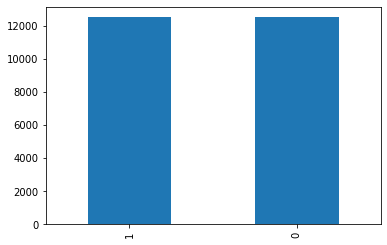

In [19]:
df['category'].value_counts().plot.bar() # đếm theo category 

### See sample image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x500 at 0x7FC8BE5C9470>


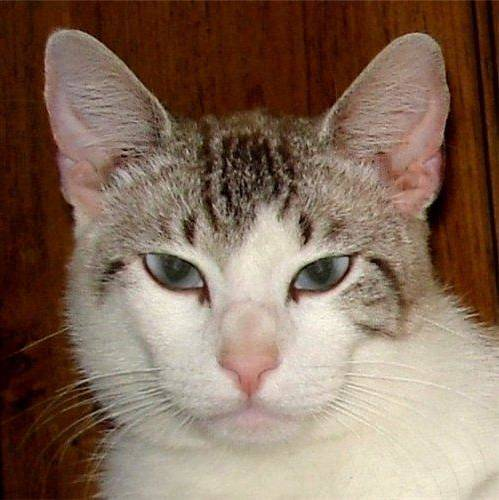

In [23]:
sample = random.choice(filenames) # chọn ngẫu nhiên một ảnh trong filename
test_img = image.load_img(os.path.join(path_train,sample))
# plt.imshow(image)
print(test_img)
test_img


In [24]:
conver_img = image.img_to_array(test_img) # đổi sang array 

In [25]:
conver_img.shape # in xem shape 

(500, 499, 3)

In [27]:
resize_img = image.load_img(os.path.join(path_train,sample),target_size=(224,224,3)) # load và resize ảnh 
x = image.img_to_array(resize_img)                              # đổi sáng numpyarray
print(type(x),x.shape)
x = x.reshape((1,) + x.shape )                        # bằng với np.expand_dims()
print(type(x),x.shape)

<class 'numpy.ndarray'> (224, 224, 3)
<class 'numpy.ndarray'> (1, 224, 224, 3)


In [28]:
input_shape = (128,128,3)

image_size = (128,128)

## Models

In [29]:
input_shape

(128, 128, 3)

In [30]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape= input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [33]:
print( " == Compiling Model ==")

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov= True) 
#  chọn đạo hàm để tối ưu , chon learning rate start, chọn decay để  stop, momentum là động lượng vượt qua điểm local minimun

model.compile(optimizer = sgd,   
                loss = 'categorical_crossentropy',   # chọn vì khi generator data chỉ có 1 class , nên ko xài được binary crossentropy
                metrics=['accuracy']) #  chọn loại để giám sát mô hình 


 == Compiling Model ==


### Callbacks

### Early Stop

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [34]:
earlystop = EarlyStopping(patience=10) # pp dừng đạo hàm 

In [35]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', # adjust learning rate 
                              factor=0.5,       # giảm đạo hàm xuống bn lần 
                              patience = 2,   # số epoch chọn khi model ko thay đổi performance
                              min_lr=0.000001)  # min của đạo hàm

In [36]:
callbacks = [reduce_lr]   

In [37]:
df

,filename,category
0,cat.9447.jpg,0
1,dog.1001.jpg,1
2,dog.7173.jpg,1
3,dog.8366.jpg,1
4,dog.2269.jpg,1
...,...,...
24995,cat.3132.jpg,0
24996,cat.4351.jpg,0
24997,cat.4089.jpg,0
24998,cat.2218.jpg,0


In [38]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})  # đổi tên cột 

In [39]:
df

,filename,category
0,cat.9447.jpg,cat
1,dog.1001.jpg,dog
2,dog.7173.jpg,dog
3,dog.8366.jpg,dog
4,dog.2269.jpg,dog
...,...,...
24995,cat.3132.jpg,cat
24996,cat.4351.jpg,cat
24997,cat.4089.jpg,cat
24998,cat.2218.jpg,cat


In [41]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42, shuffle = True)
# chia tệp dữ liệu 

In [42]:
print(train_df.count(),validate_df.count()) # đếm labels 

filename    20000
category    20000
dtype: int64 filename    5000
category    5000
dtype: int64


In [43]:
train_df

,filename,category
23311,dog.8058.jpg,dog
23623,dog.2088.jpg,dog
1020,cat.963.jpg,cat
12645,cat.9983.jpg,cat
1533,dog.10889.jpg,dog
...,...,...
21575,dog.315.jpg,dog
5390,dog.5681.jpg,dog
860,cat.1081.jpg,cat
15795,dog.6469.jpg,dog


In [44]:
validate_df

,filename,category
6868,dog.9994.jpg,dog
24016,cat.7580.jpg,cat
9668,dog.7410.jpg,dog
13640,cat.10782.jpg,cat
14018,cat.7944.jpg,cat
...,...,...
8670,dog.4257.jpg,dog
11839,dog.5649.jpg,dog
4013,cat.6893.jpg,cat
21147,dog.215.jpg,dog


In [45]:
train_df = train_df.reset_index(drop=True)    # reset lại index từ 0 đến len của labels
validate_df = validate_df.reset_index(drop=True)

In [46]:
train_df

,filename,category
0,dog.8058.jpg,dog
1,dog.2088.jpg,dog
2,cat.963.jpg,cat
3,cat.9983.jpg,cat
4,dog.10889.jpg,dog
...,...,...
19995,dog.315.jpg,dog
19996,dog.5681.jpg,dog
19997,cat.1081.jpg,cat
19998,dog.6469.jpg,dog


In [47]:
validate_df

,filename,category
0,dog.9994.jpg,dog
1,cat.7580.jpg,cat
2,dog.7410.jpg,dog
3,cat.10782.jpg,cat
4,cat.7944.jpg,cat
...,...,...
4995,dog.4257.jpg,dog
4996,dog.5649.jpg,dog
4997,cat.6893.jpg,cat
4998,dog.215.jpg,dog


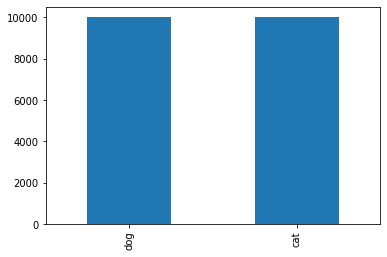

In [48]:
train_df['category'].value_counts().plot.bar() # in ra số lượng của mỗi label

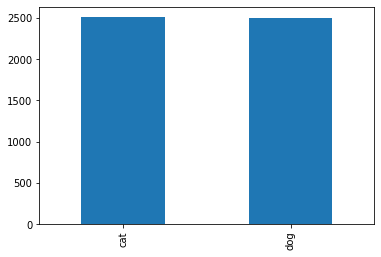

In [49]:
validate_df['category'].value_counts().plot.bar()

In [51]:
train_df.shape   # shape của datafram 

(20000, 2)

In [52]:
num_total_train = train_df.shape[0]
num_total_valid = validate_df.shape[0]

### Traning Generator

In [75]:
batch_size = 20
image_size 

(128, 128)

In [54]:
 
train_datagen = ImageDataGenerator(   # chọn các kỹ thuật data augmentation 
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
# tạo ra một train_gendata rồi fit dữ liệu vào 
train_generator = train_datagen.flow_from_dataframe(train_df,  # day la datafram shape = (20000,2)
                                                    path_train,  # day la path_dirictory 
                                                    x_col='filename',   # gép tên file vào path_train
                                                    y_col='category',   # gép cột label (count label) 
                                                    target_size=image_size,  # mục tiêu reshape ảnh thành 
                                                    class_mode='categorical', # vì loss function : categorical crossentropy
                                                    batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


### Validation Generator

In [55]:
validation_datagen = ImageDataGenerator(rescale= 1.0/255)
validation_generator = validation_datagen.flow_from_dataframe(  validate_df,  # day la datafram shape = (20000,2)
                                                                path_train,   # day la path_dirictory 
                                                                x_col='filename',
                                                                y_col='category',
                                                                target_size=image_size,
                                                                class_mode='categorical',
                                                                batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


In [56]:
print(path_train)
print(train_df,validate_df)

/home/manhduy/Documents/model_DL/Classify_dog_cat/dogs-vs-cats/train
            filename category
0       dog.8058.jpg      dog
1       dog.2088.jpg      dog
2        cat.963.jpg      cat
3       cat.9983.jpg      cat
4      dog.10889.jpg      dog
...              ...      ...
19995    dog.315.jpg      dog
19996   dog.5681.jpg      dog
19997   cat.1081.jpg      cat
19998   dog.6469.jpg      dog
19999   dog.7771.jpg      dog

[20000 rows x 2 columns]            filename category
0      dog.9994.jpg      dog
1      cat.7580.jpg      cat
2      dog.7410.jpg      dog
3     cat.10782.jpg      cat
4      cat.7944.jpg      cat
...             ...      ...
4995   dog.4257.jpg      dog
4996   dog.5649.jpg      dog
4997   cat.6893.jpg      cat
4998    dog.215.jpg      dog
4999   cat.3406.jpg      cat

[5000 rows x 2 columns]


### See how our generator work

+ Giải thích : ở đây truyền vào path_root đến thư mục chứa toàn bộ image cả tệp train với validation còn datafram ở đây là chia lại data theo tỷ lệ 0.8 ->train và 0.2-> validation  đánh lại index, và lấy tên cuối cùng của ảnh gép với cái path_root sẽ tạo ra đường dẫn đầy đủ 

+ Tương tự như vậy có thể lấy path là 1 ảnh ( nên n = 1)

In [57]:
last_path = str(train_df.sample(n=1).reset_index(drop=True))

last_path.split(" ")[-7]

'dog.5670.jpg'

### Nó sẽ giống như thế này 

In [58]:
last_path = last_path.split(" ")[-7]
print( os.path.join(path_train,last_path))

/home/manhduy/Documents/model_DL/Classify_dog_cat/dogs-vs-cats/train/dog.5670.jpg


In [71]:
example_df = train_df.sample(n=1).reset_index(drop=True)  # chọn ra path của 1 ảnh 
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    path_train, 
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


### các loại hàm loss để chọn 

#'Invalid class_mode: category; expected one of: {'raw', 'multi_output', 'sparse', 'binary', 'categorical', None, 'input'}'

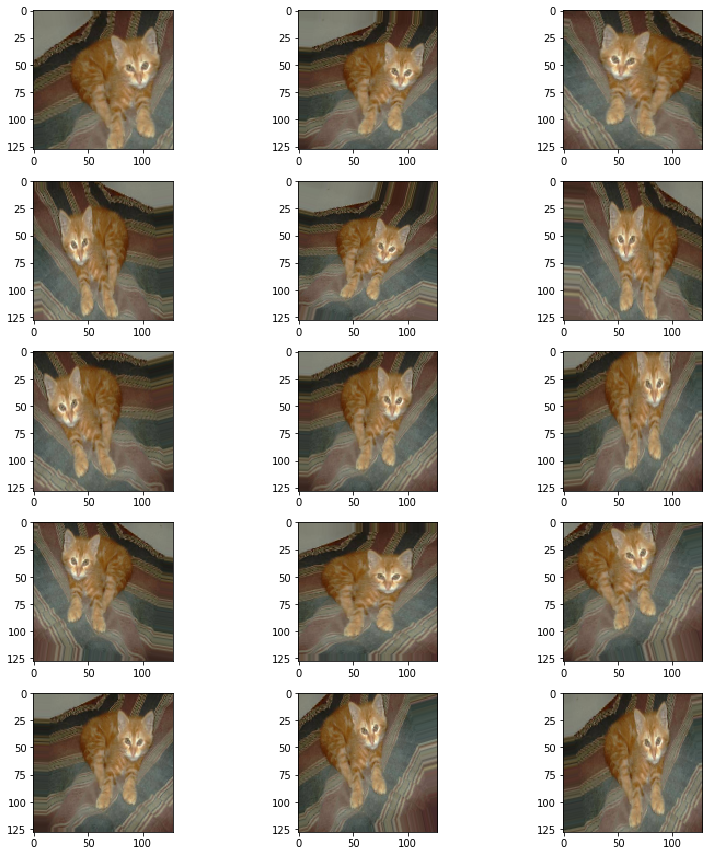

In [73]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### Woa Hình ảnh của con mèo biến thái =)) bị đảo như lạc rang  

### Fit Model

In [81]:
FAST_RUN = False
batch_size = 16

In [82]:
x , y  = train_generator[0]

print(x.shape),print(y.shape)

(20, 128, 128, 3)
(20, 2)


(None, None)

In [83]:
y[0]

array([0., 1.], dtype=float32)

In [84]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    generator = train_generator, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=num_total_valid//batch_size,
    steps_per_epoch=num_total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/20
  16/1250 [..............................] - ETA: 11:24 - loss: 1.5812 - accuracy: 0.5469

KeyboardInterrupt: 

### Save Model

In [ ]:
model.save_weights("model.h5")

### Virtualize Training 

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Prepare Testing Data

In [ ]:
test_filenames = os.listdir("../input/test1/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

### Create Testing Generator

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../input/test1/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

### Predict

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

 For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

 We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

 From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

### Virtaulize Result

In [ ]:
test_df['category'].value_counts().plot.bar()

### See predicted result with images

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../input/test1/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)